In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SurgPhaseRecog.data as data

from sklearn.manifold import TSNE

## Function

In [2]:
def listdir(path, ending=None):
    '''Returns dir with full path'''
    if ending == None:
        return sorted([os.path.join(path, f) for f in os.listdir(path)])
    else:
        return sorted([os.path.join(path, f) for f in os.listdir(path)
                       if f.endswith(ending)])

In [ ]:
def plot_op_embed(embeddings_1, embeddings_2, folder_1_label, folder_2_label, save_name):
    # Combine the embeddings from both folders
    combined_embeddings = np.vstack((embeddings_1, embeddings_2))

    # Apply t-SNE to reduce dimensions
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(combined_embeddings)

    # Split back into two datasets for plotting
    reduced_embeddings_1 = reduced_embeddings[:len(embeddings_1)]
    reduced_embeddings_2 = reduced_embeddings[len(embeddings_1):]

    # Plot the t-SNE embeddings
    plt.figure(figsize=(5, 5), dpi=100) # set dpi=600 for publication quality
    plt.scatter(
        reduced_embeddings_1[:, 0], reduced_embeddings_1[:, 1], 
        label=folder_1_label, color='#1d3557', alpha=0.6)
    plt.scatter(
        reduced_embeddings_2[:, 0], reduced_embeddings_2[:, 1], 
        label=folder_2_label, color='#e63946', alpha=0.3)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    leg = plt.legend(ncol=2, loc="lower center", framealpha=1.0, fontsize=14, markerscale=1.5)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    
    plt.savefig(save_name, bbox_inches='tight')

## Data & Plot

In [4]:
synops_path = '/DATA/kubi/Dataset/SynPoCaP/'
realops_path = '/DATA/kubi/Dataset/PoCaP/'

synops_list = listdir(synops_path, ending='.pkl')
realops_list = listdir(realops_path, ending='.pkl')

synops_tag = 'SynPoCaP'
realops_tag = 'PoCaP'

In [5]:
syndataset = data.get_dataset(synops_list, 512)
realdataset = data.get_dataset(realops_list, 512)

In [6]:
syn_op_count = len(syndataset['data'])

syn_op_label = np.zeros((syn_op_count,))
syn_op_embed = np.zeros((syn_op_count, 1024))
for idx, data_loader in enumerate(syndataset['data']):
    _, embed, label = next(iter(data_loader))
    syn_op_embed[idx, :] = np.mean(embed.cpu().numpy(), axis=0)
    syn_op_label[idx] = 0

In [7]:
real_op_count = len(realdataset['data'])

real_op_label = np.zeros((real_op_count,))
real_op_embed = np.zeros((real_op_count, 1024))
for idx, data_loader in enumerate(realdataset['data']):
    _, embed, label = next(iter(data_loader))
    real_op_embed[idx, :] = np.mean(embed.cpu().numpy(), axis=0)
    real_op_label[idx] = 1

/tmp/ipykernel_3802525/1336219212.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


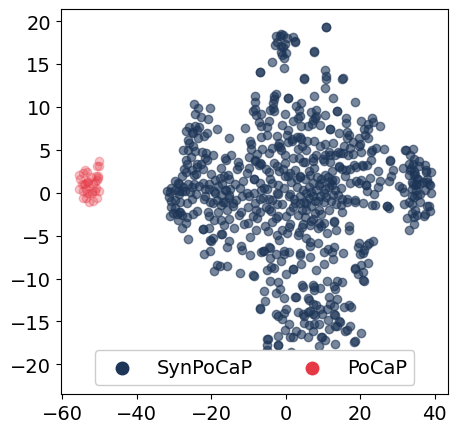

In [8]:
plot_op_embed(
    syn_op_embed,
    real_op_embed,
    'SynPoCaP',
    'PoCaP',
    'Figure6.jpg'
)